# Average yards per pass play per team/distribution 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)

In [3]:
# Reading in plays Dataset
plays = pd.read_csv('data/plays.csv')

In [4]:
plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [5]:
# Reading in games Dataset
games = pd.read_csv('data/games.csv')

In [6]:
games.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,9/6/18,20:20:00,PHI,ATL,1
1,2018090901,9/9/18,13:00:00,CLE,PIT,1
2,2018090902,9/9/18,13:00:00,IND,CIN,1
3,2018090903,9/9/18,13:00:00,MIA,TEN,1
4,2018090900,9/9/18,13:00:00,BAL,BUF,1


In [7]:
# Merging Games and Plays dataset on gameId
game_play = plays.merge(games, on='gameId')

In [8]:
game_play.head(50)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False,9/6/18,20:20:00,PHI,ATL,1
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False,9/6/18,20:20:00,PHI,ATL,1
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False,9/6/18,20:20:00,PHI,ATL,1
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False,9/6/18,20:20:00,PHI,ATL,1
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False,9/6/18,20:20:00,PHI,ATL,1
5,2018090600,320,(10:10) (Shotgun) N.Foles pass short left to N...,1,2,8,PHI,play_type_pass,PHI,4,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,4.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0.0,0.0,10:10:00,14.0,NaN,NaN,C,4,4,-0.344096,False,9/6/18,20:20:00,PHI,ATL,1
6,2018090600,344,(9:24) (Shotgun) N.Foles pass incomplete short...,1,3,4,PHI,play_type_pass,PHI,8,EMPTY,"1 RB, 2 TE, 2 WR",6.0,4.0,"3 DL, 3 LB, 5 DB",TRADITIONAL,0.0,0.0,9:24:00,18.0,NaN,NaN,I,0,0,-1.192208,False,9/6/18,20:20:00,PHI,ATL,1
7,2018090600,402,(9:08) M.Ryan pass incomplete deep left to M.S...,1,1,10,ATL,play_type_pass,PHI,44,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,9:08:00,54.0,NaN,NaN,I,0,0,-0.429863,False,9/6/18,20:20:00,PHI,ATL,1
8,2018090600,492,(7:01) M.Ryan pass short left to T.Coleman pus...,1,2,13,ATL,play_type_pass,PHI,36,SINGLEBACK,"1 RB, 2 TE, 2 WR",8.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,7:01:00,46.0,NaN,NaN,C,26,26,1.879804,False,9/6/18,20:20:00,PHI,ATL,1
9,2018090600,521,(6:19) M.Ryan pass short left to A.Hooper to P...,1,1,10,ATL,play_type_pass,PHI,10,SINGLEBACK,"1 RB, 2 TE, 2 WR",8.0,3.0,"4 DL, 2 LB, 5 DB",DESIGNED_ROLLOUT_LEFT,0.0,0.0,6:19:00,20.0,NaN,NaN,C,3,3,0.045665,False,9/6/18,20:20:00,PHI,ATL,1


In [9]:
# Get only pass plays dataset
g = game_play[['gameId','yardsToGo','possessionTeam','playType','playResult']]
g = g.loc[g['playType'].str.contains("pass", na=False)]
g.head()

,gameId,yardsToGo,possessionTeam,playType,playResult
0,2018090600,15,ATL,play_type_pass,10
1,2018090600,10,ATL,play_type_pass,0
2,2018090600,10,ATL,play_type_pass,0
3,2018090600,10,ATL,play_type_pass,33
4,2018090600,1,ATL,play_type_pass,0


### Get Average Yards Gained

In [10]:
# Get the averafe yards gained by the Team who is in possesion of the day
avg = g.groupby(['possessionTeam']).agg({'playResult': 'mean'}).reset_index().sort_values(by=['playResult'],ascending=False)
avg.head()


,possessionTeam,playResult
15,KC,8.875451
29,TB,8.619200
17,LAC,8.393478
16,LA,8.332155
12,HOU,8.249505


### Get top 2 team results and last 2 team results:

Top 2:
- Patriots
- Rams

Bottom 2:
- Raiders
- Cardinals

In [11]:
patriots_good = g[(g['possessionTeam']=='NE')]
rams_good = g[(g['possessionTeam']=='LA')]
raiders = g[(g['possessionTeam']=='OAK')]
cardinals = g[(g['possessionTeam']=='AZ')]

Text(0.5, 1.0, 'Yards per Passplay Frequency \n for Raiders')

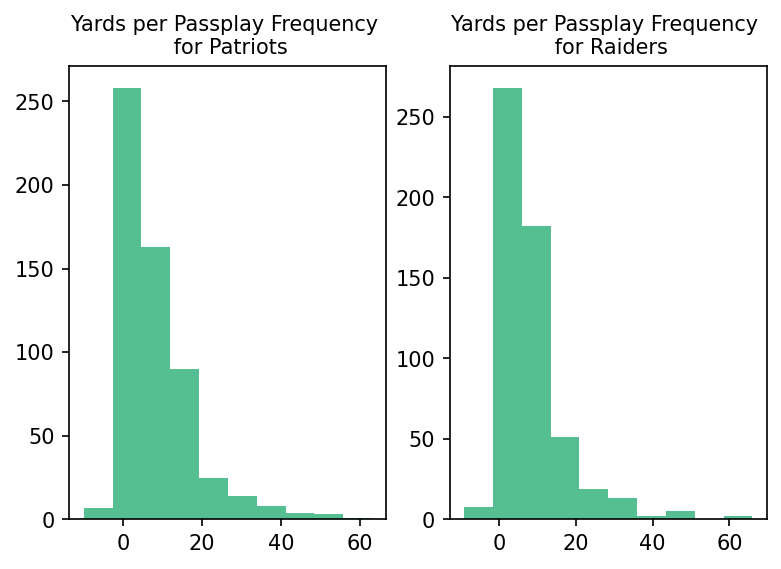

In [12]:
fig,ax = plt.subplots(1,2)
fig.set_dpi(150)
ax[0].hist(patriots_good.playResult, color='#55bf91')
ax[0].set_title('Yards per Passplay Frequency \n for Patriots', fontsize = 10)

ax[1].hist(raiders.playResult, color='#55bf91')
ax[1].set_title('Yards per Passplay Frequency \n for Raiders', fontsize = 10)


### Read in nfl teams data and nfl standings data from 2018

In [13]:
# Read in the dataset of the nfl teams and nfl standings and merge on the team names
nfl_teams = pd.read_csv('data/nfl_teams.csv')
nfl_standings = pd.read_csv('data/nfl_standings.csv')

In [14]:
nfl_standings = nfl_standings[['Name','Wins']]
nfl_standings_order = nfl_standings.merge(nfl_teams, how = 'left', on='Name')

In [15]:
avg['Abbreviation'] = avg['possessionTeam']

In [16]:
nfl_standings_order = nfl_standings_order.merge(avg, how = 'left', on='Abbreviation')
nfl_standings_order.head()

,Name,Wins,ID,Abbreviation,Conference,Division,possessionTeam,playResult
0,New Orleans Saints,13,20.0,NO,NFC,South,NO,8.042802
1,Los Angeles Rams,13,29.0,LA,NFC,West,LA,8.332155
2,Chicago Bears,12,6.0,CHI,NFC,North,CHI,7.634298
3,Los Angeles Chargers,12,26.0,LAC,AFC,West,LAC,8.393478
4,Kansas City Chiefs,12,16.0,KC,AFC,West,KC,8.875451


Text(0.5, 1.0, 'Average Yards gained per pass play vs. Team')

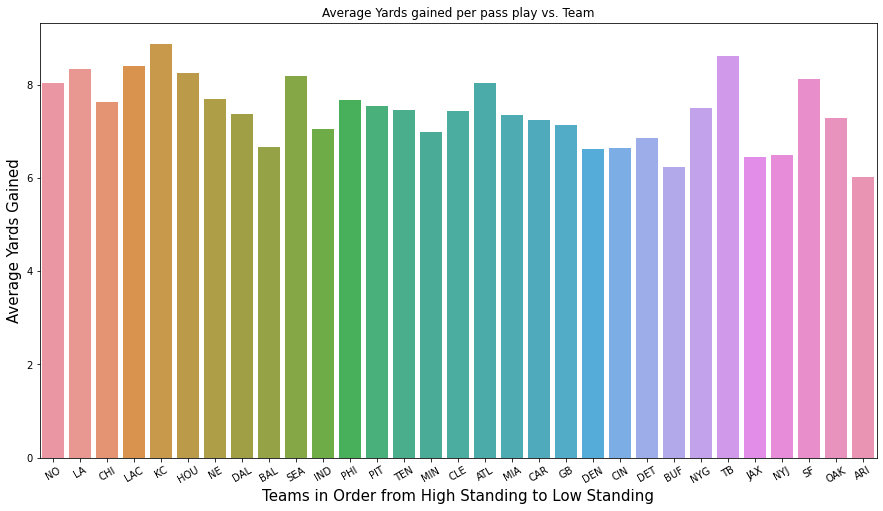

In [17]:
# Plot figure in order of winning teams
plt.figure(figsize = (15,8))
ax = sns.barplot(x="possessionTeam", y="playResult", data=nfl_standings_order)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_xlabel("Teams in Order from High Standing to Low Standing", fontsize = 15)
ax.set_ylabel("Average Yards Gained", fontsize = 15)
ax.set_title("Average Yards gained per pass play vs. Team")

[(2.9, 13.1)]

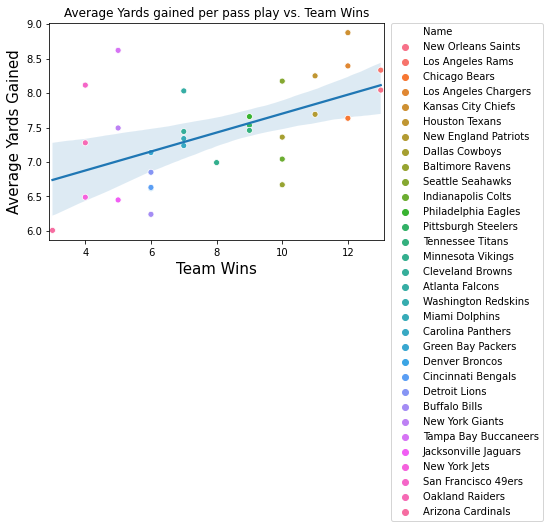

In [18]:
import numpy as np
import statsmodels.api as sm

sns.regplot(x="Wins", y="playResult", data=nfl_standings_order, scatter_kws={"color": "white"})

ax = sns.scatterplot(data=nfl_standings_order, x="Wins", y="playResult", hue="Name")

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("Team Wins", fontsize = 15)
ax.set_ylabel("Average Yards Gained", fontsize = 15)
ax.set_title("Average Yards gained per pass play vs. Team Wins")
ax.set(xlim=(2.9, 13.1))


You can slightly see that higher ranked teams have more average yard per pass play versus the lower ranked teams.

In [19]:
first_team_New_Orleans_Saints = g[(g['possessionTeam']=='NO')]
sec_team_Los_Angeles_Rams = g[(g['possessionTeam']=='LA')]
sec_last_Oakland_Raiders = g[(g['possessionTeam']=='OAK')]
last_Arizona_Cardinals = g[(g['possessionTeam']=='ARI')]

### Plot top 2 standings teams (Saints, Rams) and bottom 2 standing teams (Raiders, Cardinals)

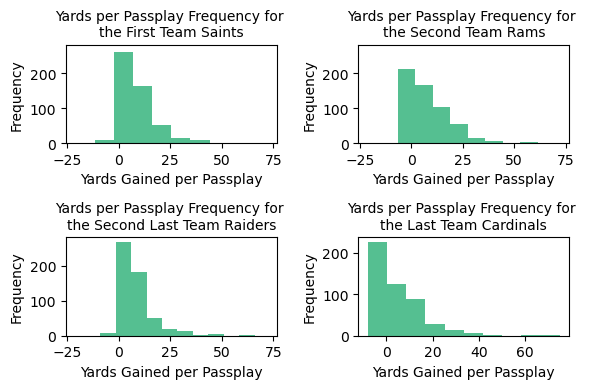

In [20]:
fig,ax = plt.subplots(2,2)
fig.set_dpi(100)
ax[0][0].hist(first_team_New_Orleans_Saints.playResult, color='#55bf91')
ax[0][0].set_title('Yards per Passplay Frequency for \nthe First Team Saints', fontsize = 10)
ax[0][0].set_xlabel("Yards Gained per Passplay")
ax[0][0].set_ylabel("Frequency")

ax[0][1].hist(sec_team_Los_Angeles_Rams.playResult, color='#55bf91')
ax[0][1].set_title('Yards per Passplay Frequency for \nthe Second Team Rams', fontsize = 10)
ax[0][1].set_xlabel("Yards Gained per Passplay")
ax[0][1].set_ylabel("Frequency")

ax[1][0].hist(sec_last_Oakland_Raiders.playResult, color='#55bf91')
ax[1][0].set_title('Yards per Passplay Frequency for \nthe Second Last Team Raiders', fontsize = 10)
ax[1][0].set_xlabel("Yards Gained per Passplay")
ax[1][0].set_ylabel("Frequency")

ax[1][1].hist(last_Arizona_Cardinals.playResult, color='#55bf91')
ax[1][1].set_title('Yards per Passplay Frequency for \nthe Last Team Cardinals', fontsize = 10)
ax[1][1].set_xlabel("Yards Gained per Passplay")
ax[1][1].set_ylabel("Frequency")

ax[0][1].get_shared_x_axes().join(ax[0][0], ax[0][1])
ax[1][0].get_shared_x_axes().join(ax[0][1], ax[1][0])

ax[0][1].get_shared_y_axes().join(ax[0][0], ax[0][1])
ax[1][0].get_shared_y_axes().join(ax[0][1], ax[1][0])



fig.tight_layout()

Text(0.5, 1.0, 'Average Yards gained per pass play vs. Team Wins')

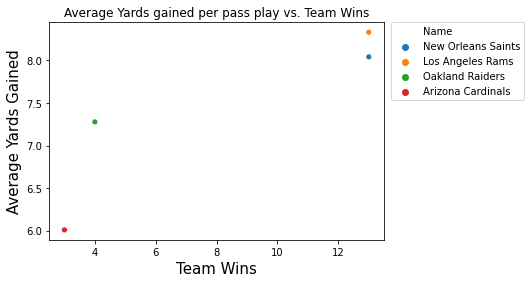

In [21]:
nfl_standings_top_two = nfl_standings_order[:2]
nfl_standings_last_two = nfl_standings_order.tail(2)
frames = [nfl_standings_top_two,nfl_standings_last_two]
result = pd.concat(frames)
ax = sns.scatterplot(data=result, x="Wins", y="playResult", hue="Name")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.set_xlabel("Team Wins", fontsize = 15)
ax.set_ylabel("Average Yards Gained", fontsize = 15)
ax.set_title("Average Yards gained per pass play vs. Team Wins")

The above plot shows that the losing teams are less average yards per pass play while the winning teams have more average yards per pass play.